In [31]:
import pandas as pd
import numpy as np

In [32]:
import csv
df = pd.read_csv("data/Womens_Clothing_E_Commerce_Reviews.csv")
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [34]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [35]:
df = df.drop(['Title',"Clothing ID"], axis=1)
df = df.dropna(subset=["Review Text", "Division Name", "Department Name", "Class Name"])
df.isna().sum()



Unnamed: 0                 0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [36]:
df = df.reset_index(drop=True)

In [37]:
df

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
22623,23481,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
22624,23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
22625,23483,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
22626,23484,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [38]:
df.shape

(22628, 9)

In [39]:
def map_sentiment(rating):
    if rating >= 3:
        return 'positive'
    else:
        return 'negative'
df['Sentiment'] = df['Rating'].apply(map_sentiment)

In [40]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positive
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positive
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,positive
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positive
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positive


In [41]:
df["Division Name"].value_counts()

Division Name
General           13365
General Petite     7837
Initmates          1426
Name: count, dtype: int64

In [42]:
df["Class Name"].value_counts()

Class Name
Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

In [43]:
df['Department Name'].value_counts()    

Department Name
Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: count, dtype: int64

In [44]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Setup
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()



[nltk_data] Downloading package punkt to
[nltk_data]     /home/sarath_kumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sarath_kumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords

def clean_review_text(df, text_column='Review Text'):
    """
    Cleans the review text in the specified column of a DataFrame:
    - Lowercases the text
    - Removes punctuation
    - Removes numbers
    - Removes stopwords
    - Removes rare words (frequency <= 1)
    
    Returns the DataFrame with a new column 'Cleaned_Review'.
    """
    # Ensure copy to avoid modifying original
    df = df.copy()
    
    # Lowercase
    df[text_column] = df[text_column].str.lower()
    
    # Remove punctuation
    df[text_column] = df[text_column].str.replace(r'[^\w\s]', '', regex=True)
    
    # Remove numbers
    df[text_column] = df[text_column].str.replace(r'\d+', '', regex=True)
    
    # Remove stopwords
    sw = set(stopwords.words('english'))
    df[text_column] = df[text_column].apply(
        lambda x: " ".join(word for word in str(x).split() if word not in sw)
    )
    
    # Remove rare words
    word_freq = pd.Series(' '.join(df[text_column]).split()).value_counts()
    rare_words = set(word_freq[word_freq <= 1].index)
    
    df['Cleaned_Review'] = df[text_column].apply(
        lambda x: " ".join(word for word in x.split() if word not in rare_words)
    )
    
    return df


In [46]:
df = clean_review_text(df, text_column='Review Text')


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def train_and_evaluate_multiclass_models(df, text_column='Cleaned_Review', target_column='Sentiment'):
    """
    Trains and evaluates multiple classifiers on multiclass text data using TF-IDF features.

    Parameters:
        df (pd.DataFrame): Input DataFrame with cleaned text and sentiment labels.
        text_column (str): Name of the column containing cleaned text data.
        target_column (str): Name of the column containing sentiment labels.
    """

    # Step 1: TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(df[text_column])
    y = df[target_column]

    # Step 2: Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    class_names = le.classes_

    # Step 3: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Step 4: Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": SVC(kernel='linear'),
        "Naive Bayes": MultinomialNB(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    # Step 5: Train, predict, and evaluate
    metrics_summary = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        metrics_summary.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

        # Print classification report
        print(f"\n🔍 Model: {name}")
        print(classification_report(y_test, y_pred, target_names=class_names))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap='Blues')
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

    # Step 6: Plot all metrics
    metrics_df = pd.DataFrame(metrics_summary).set_index("Model")
    metrics_df.plot(kind="bar", figsize=(10, 6), colormap="tab10", title="Model Evaluation Metrics (Multiclass)")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Step 7: Show final table
    print("\n📊 Summary Table:")
    display(metrics_df)




🔍 Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.78      0.27      0.40       474
    positive       0.92      0.99      0.95      4052

    accuracy                           0.92      4526
   macro avg       0.85      0.63      0.68      4526
weighted avg       0.91      0.92      0.90      4526



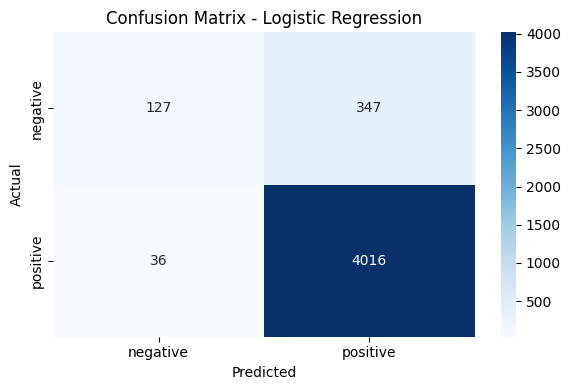


🔍 Model: SVM
              precision    recall  f1-score   support

    negative       0.72      0.32      0.44       474
    positive       0.92      0.99      0.95      4052

    accuracy                           0.92      4526
   macro avg       0.82      0.65      0.70      4526
weighted avg       0.90      0.92      0.90      4526



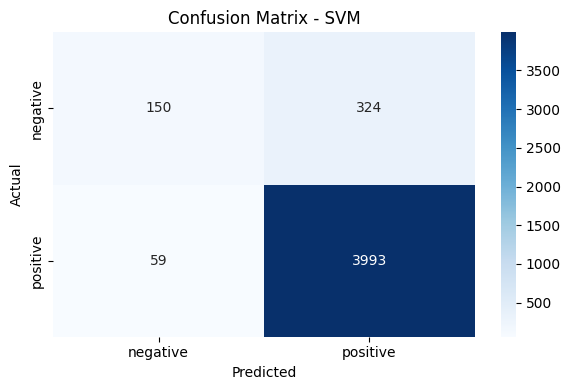


🔍 Model: Naive Bayes
              precision    recall  f1-score   support

    negative       0.69      0.02      0.04       474
    positive       0.90      1.00      0.95      4052

    accuracy                           0.90      4526
   macro avg       0.79      0.51      0.50      4526
weighted avg       0.88      0.90      0.85      4526



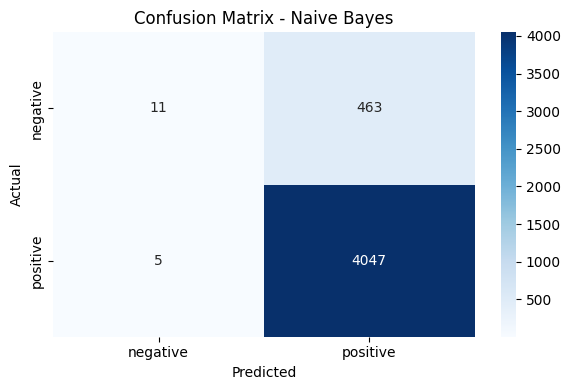


🔍 Model: Random Forest
              precision    recall  f1-score   support

    negative       0.79      0.05      0.09       474
    positive       0.90      1.00      0.95      4052

    accuracy                           0.90      4526
   macro avg       0.85      0.52      0.52      4526
weighted avg       0.89      0.90      0.86      4526



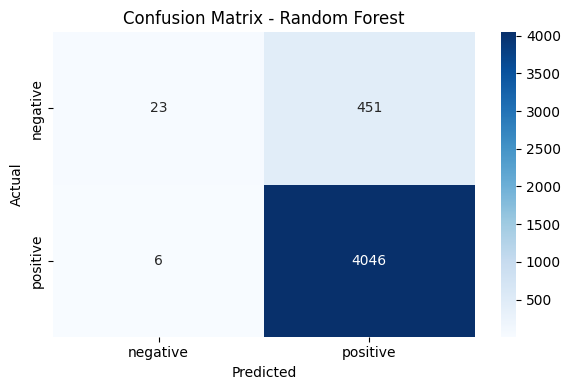

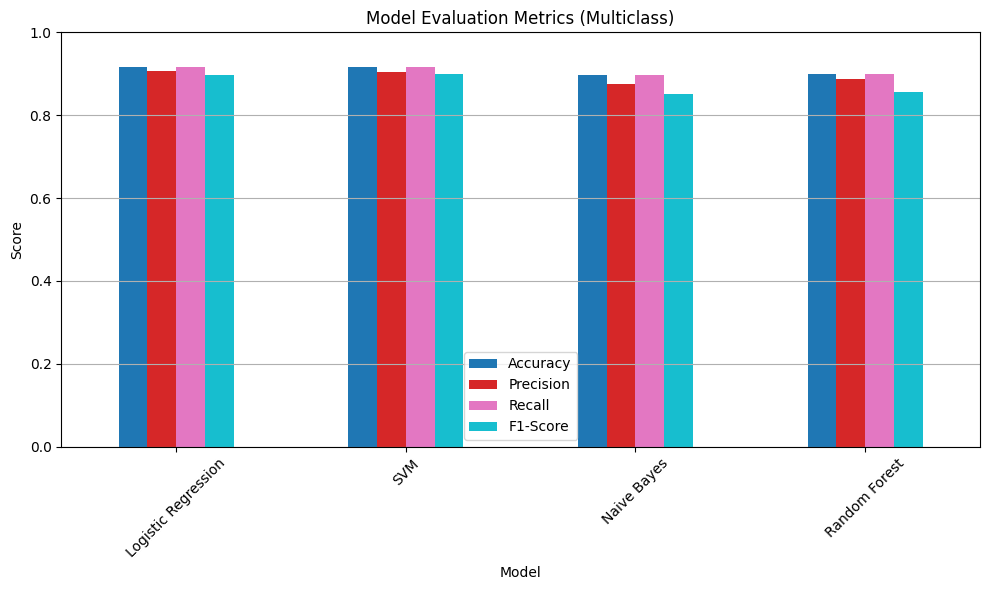


📊 Summary Table:


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.915378,0.905667,0.915378,0.896284
SVM,0.915378,0.903244,0.915378,0.900301
Naive Bayes,0.896597,0.875363,0.896597,0.851038
Random Forest,0.899028,0.888546,0.899028,0.856991


In [48]:
train_and_evaluate_multiclass_models(df)


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.callbacks import EarlyStopping
# from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
# from transformers import pipeline as hf_pipeline
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
url = "data/Womens_Clothing_E_Commerce_Reviews.csv"
df = pd.read_csv(url)



[nltk_data] Downloading package punkt to
[nltk_data]     /home/sarath_kumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sarath_kumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sarath_kumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


         Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           

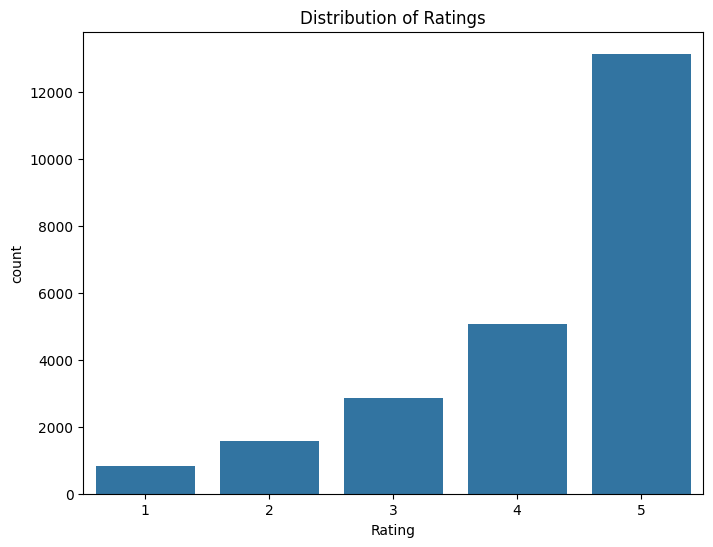

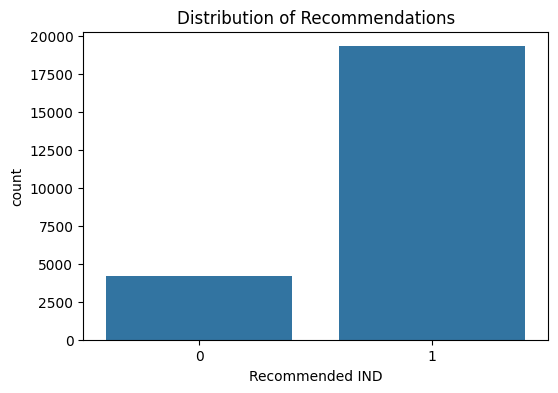

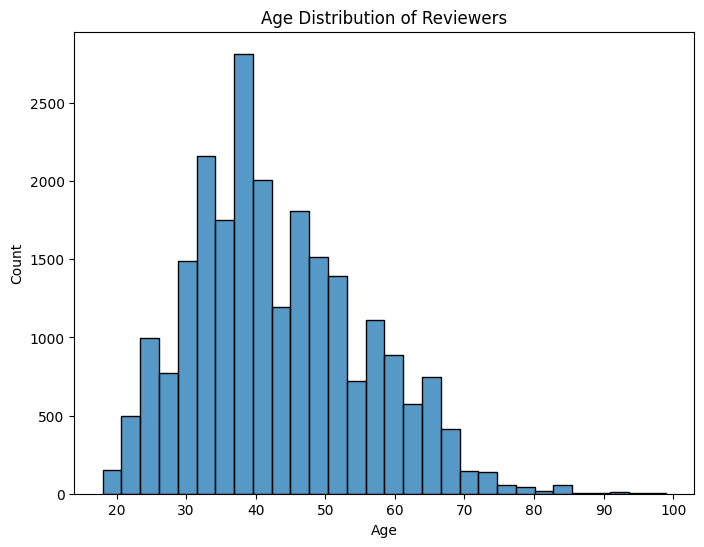

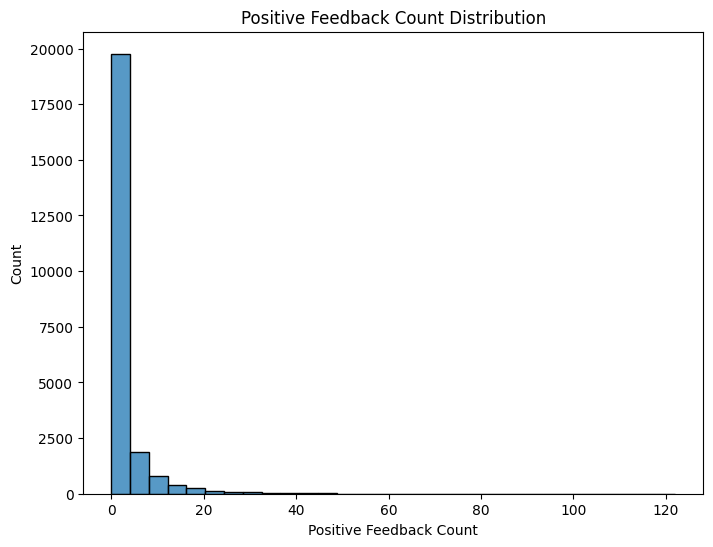

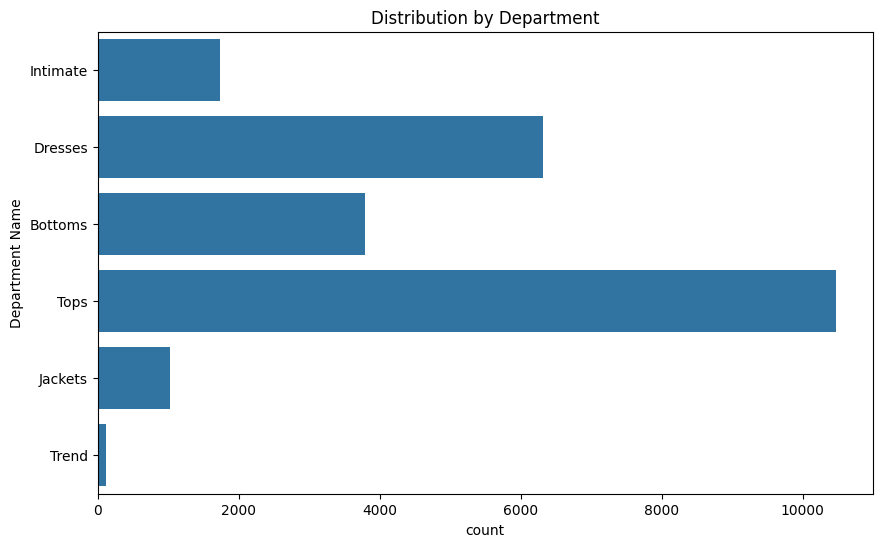

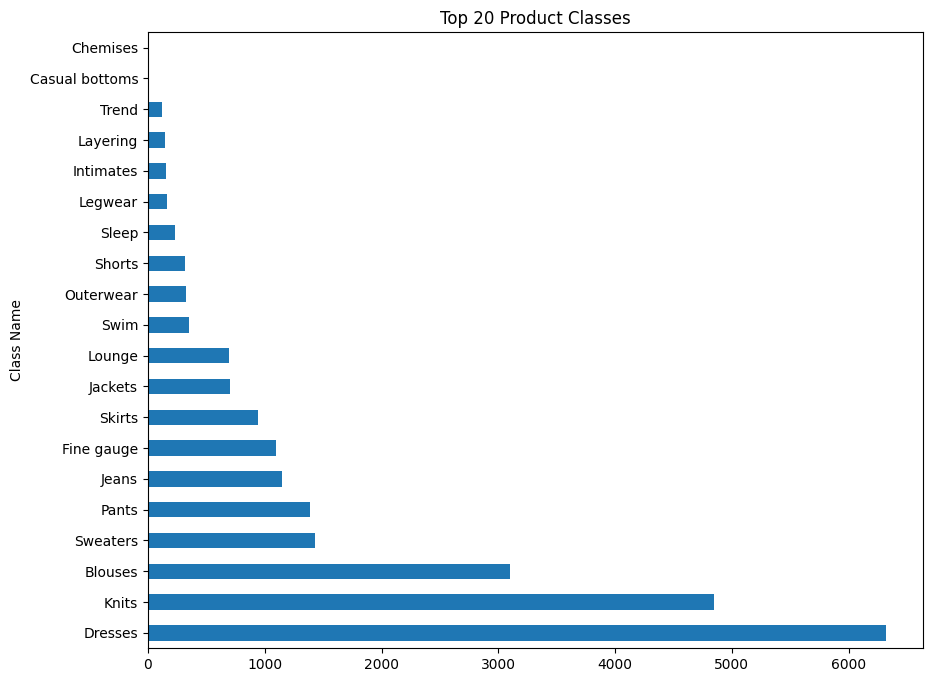

In [30]:
# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Visualize recommendation distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended IND', data=df)
plt.title('Distribution of Recommendations')
plt.show()

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30)
plt.title('Age Distribution of Reviewers')
plt.show()

# Positive feedback count distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Positive Feedback Count'], bins=30)
plt.title('Positive Feedback Count Distribution')
plt.show()

# Department distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Department Name', data=df)
plt.title('Distribution by Department')
plt.show()

# Class distribution (top 20)
plt.figure(figsize=(10, 8))
df['Class Name'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 Product Classes')
plt.show()

In [33]:
import pandas as pd
import re
from nltk.corpus import stopwords

def clean_text(df, text_column='Review Text'):
    """
    Cleans the review text in the specified column of a DataFrame:
    - Lowercases the text
    - Removes punctuation
    - Removes numbers
    - Removes stopwords
    - Removes rare words (frequency <= 1)
    
    Returns the DataFrame with a new column 'Cleaned_Review'.
    """
    # Ensure copy to avoid modifying original
    df = df.copy()
    
    # Lowercase
    df[text_column] = df[text_column].str.lower()
    
    # Remove punctuation
    df[text_column] = df[text_column].str.replace(r'[^\w\s]', '', regex=True)
    
    # Remove numbers
    df[text_column] = df[text_column].str.replace(r'\d+', '', regex=True)
    
    # Remove stopwords
    sw = set(stopwords.words('english'))
    df[text_column] = df[text_column].apply(
        lambda x: " ".join(word for word in str(x).split() if word not in sw)
    )
    
    # Remove rare words
    word_freq = pd.Series(' '.join(df[text_column]).split()).value_counts()
    rare_words = set(word_freq[word_freq <= 1].index)
    
    df['Cleaned_Review'] = df[text_column].apply(
        lambda x: " ".join(word for word in x.split() if word not in rare_words)
    )
    
    return df


In [36]:
df = clean_text(df,'Review Text')

                                         Review Text  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store im ...   
2  high hopes dress really wanted work initially ...   
3  love love love jumpsuit fun flirty fabulous ev...   
4  shirt flattering due adjustable front tie perf...   

                                      Cleaned_Review  
0        absolutely wonderful silky sexy comfortable  
1  love dress sooo pretty happened find store im ...  
2  high hopes dress really wanted work initially ...  
3  love love love jumpsuit fun flirty fabulous ev...  
4  shirt flattering due adjustable front tie perf...  
Sentiment
Positive    18208
Neutral      2871
Negative     2407
Name: count, dtype: int64


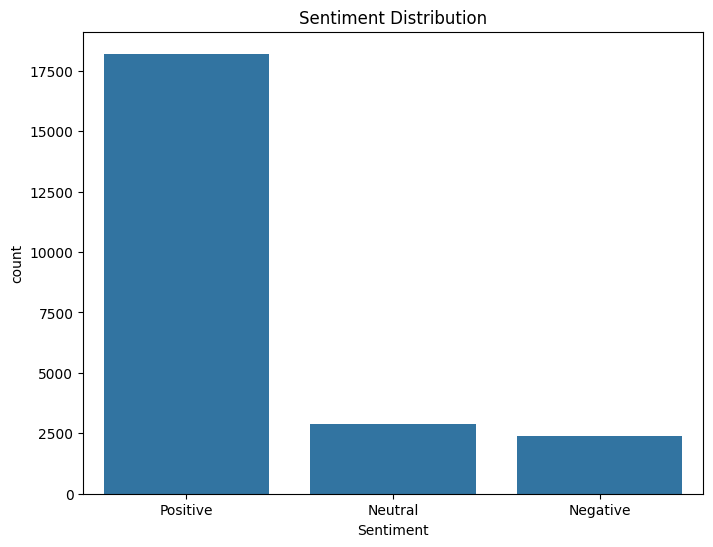

In [37]:

# Check cleaned text
print(df[['Review Text', 'Cleaned_Review']].head())

# Handle missing values
df = df.dropna(subset=['Review Text', 'Rating', 'Recommended IND'])

# Create a sentiment label based on Rating
def create_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Rating'].apply(create_sentiment)

# Check sentiment distribution
print(df['Sentiment'].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

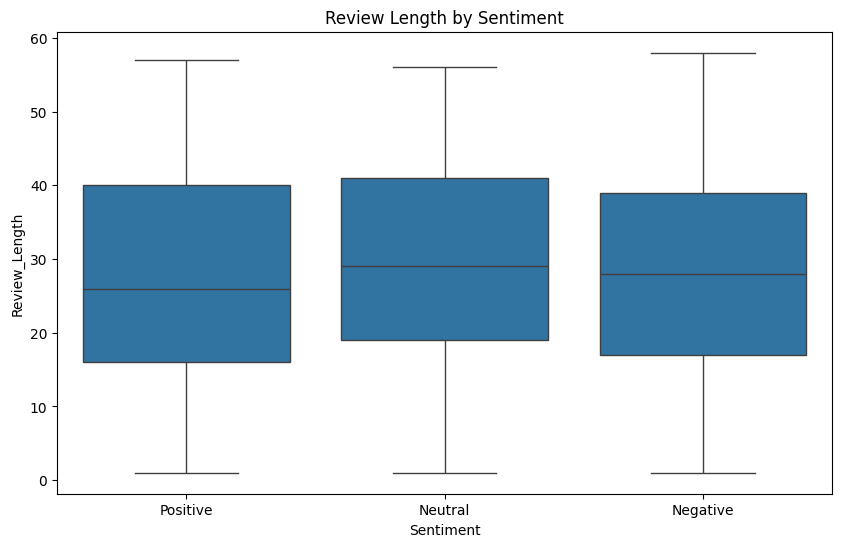

In [38]:
# Review length feature
df['Review_Length'] = df['Cleaned_Review'].apply(lambda x: len(x.split()))

# Word count distribution by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Review_Length', data=df)
plt.title('Review Length by Sentiment')
plt.show()

# Create binary labels for classification
df['Recommended_LABEL'] = df['Recommended IND'].astype(int)
df['Sentiment_LABEL'] = df['Sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

# Prepare data for topic modeling
reviews_for_tm = df['Cleaned_Review'].tolist()

Topics found via LDA:
Topic 1:
dress love beautiful fabric store like online flattering wear saw
Topic 2:
sweater color love wear like soft nice really shirt fabric
Topic 3:
size small im fit ordered medium xs petite large wear
Topic 4:
love great jeans wear comfortable perfect fit pants soft color
Topic 5:
like look fit fabric really im waist material way shirt


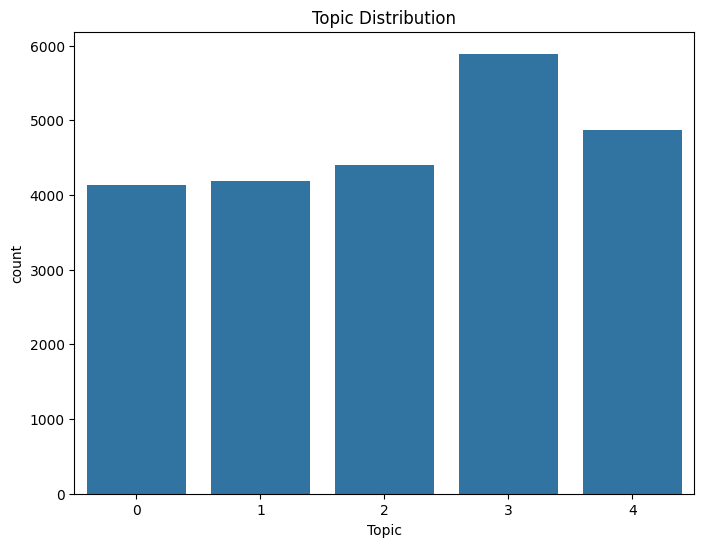

In [39]:
# Vectorize the text data for topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tm_matrix = vectorizer.fit_transform(reviews_for_tm)

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tm_matrix)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("Topics found via LDA:")
display_topics(lda, vectorizer.get_feature_names_out(), 10)

# Assign topics to reviews
topic_results = lda.transform(tm_matrix)
df['Topic'] = topic_results.argmax(axis=1)

# Visualize topic distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Topic', data=df)
plt.title('Topic Distribution')
plt.show()


Logistic Regression - Sentiment Analysis Performance:
              precision    recall  f1-score   support

    Negative       0.57      0.39      0.46       470
     Neutral       0.46      0.20      0.28       620
    Positive       0.86      0.98      0.91      3608

    accuracy                           0.81      4698
   macro avg       0.63      0.52      0.55      4698
weighted avg       0.78      0.81      0.78      4698



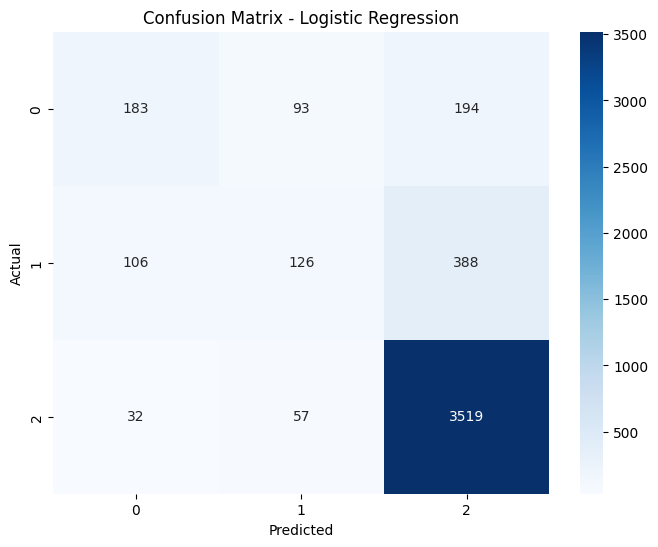


SVM - Sentiment Analysis Performance:
              precision    recall  f1-score   support

    Negative       0.55      0.43      0.49       470
     Neutral       0.46      0.22      0.30       620
    Positive       0.87      0.97      0.91      3608

    accuracy                           0.82      4698
   macro avg       0.63      0.54      0.57      4698
weighted avg       0.78      0.82      0.79      4698



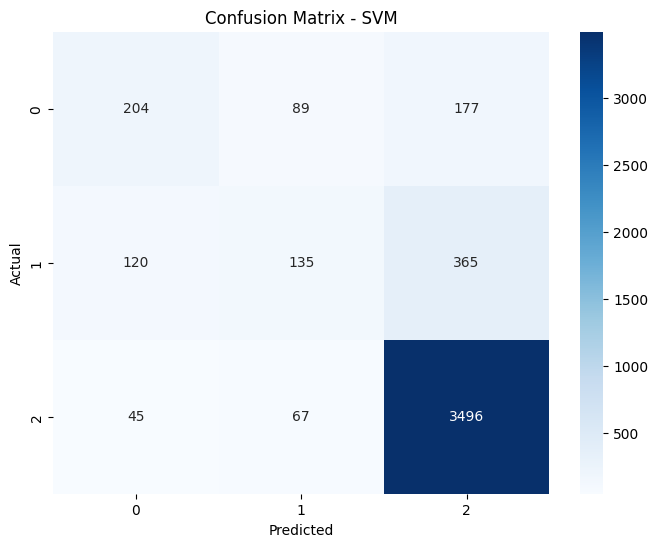


Random Forest - Sentiment Analysis Performance:
              precision    recall  f1-score   support

    Negative       0.67      0.16      0.25       470
     Neutral       0.56      0.02      0.05       620
    Positive       0.79      1.00      0.88      3608

    accuracy                           0.79      4698
   macro avg       0.67      0.39      0.39      4698
weighted avg       0.75      0.79      0.71      4698



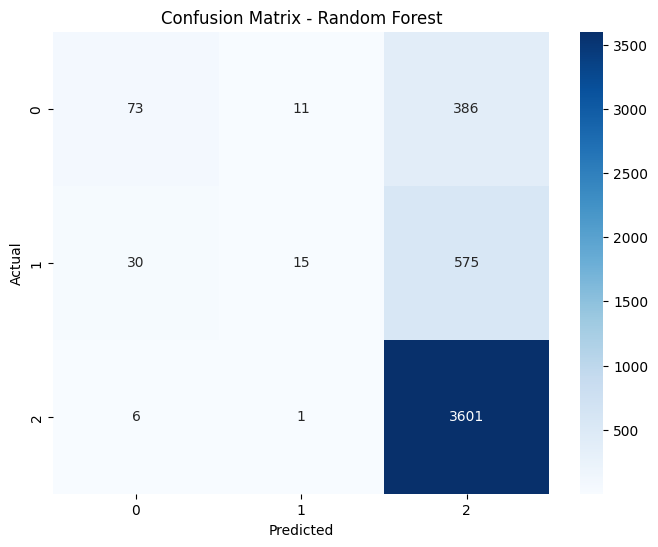


Naive Bayes - Sentiment Analysis Performance:
              precision    recall  f1-score   support

    Negative       0.81      0.10      0.17       470
     Neutral       0.57      0.02      0.04       620
    Positive       0.78      1.00      0.88      3608

    accuracy                           0.78      4698
   macro avg       0.72      0.37      0.36      4698
weighted avg       0.75      0.78      0.70      4698



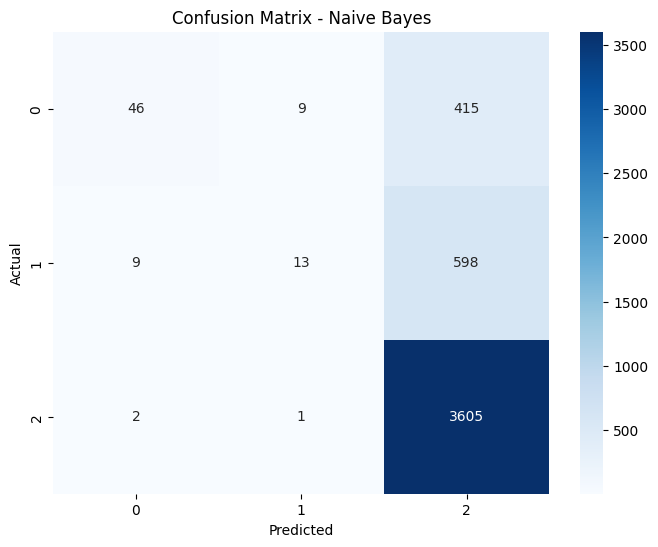


Logistic Regression - Recommendation Classification Performance:
                 precision    recall  f1-score   support

Not Recommended       0.80      0.49      0.61       851
    Recommended       0.90      0.97      0.93      3847

       accuracy                           0.89      4698
      macro avg       0.85      0.73      0.77      4698
   weighted avg       0.88      0.89      0.87      4698



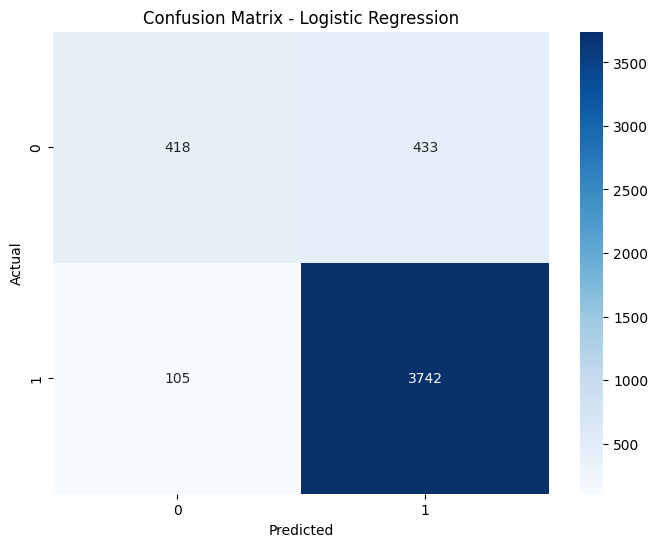


SVM - Recommendation Classification Performance:
                 precision    recall  f1-score   support

Not Recommended       0.77      0.56      0.65       851
    Recommended       0.91      0.96      0.93      3847

       accuracy                           0.89      4698
      macro avg       0.84      0.76      0.79      4698
   weighted avg       0.88      0.89      0.88      4698



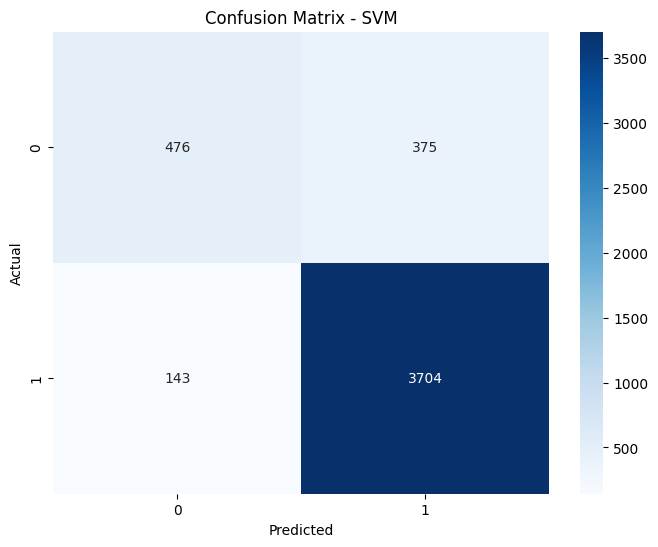


Random Forest - Recommendation Classification Performance:
                 precision    recall  f1-score   support

Not Recommended       0.84      0.26      0.39       851
    Recommended       0.86      0.99      0.92      3847

       accuracy                           0.86      4698
      macro avg       0.85      0.62      0.66      4698
   weighted avg       0.85      0.86      0.82      4698



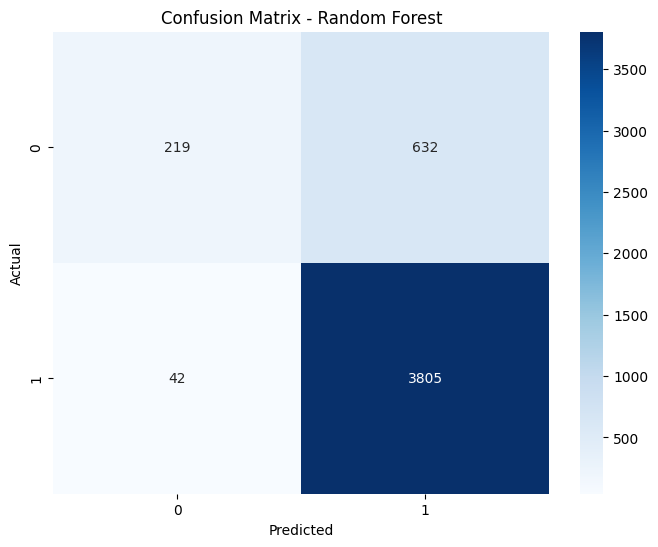


Naive Bayes - Recommendation Classification Performance:
                 precision    recall  f1-score   support

Not Recommended       0.87      0.17      0.28       851
    Recommended       0.84      0.99      0.91      3847

       accuracy                           0.84      4698
      macro avg       0.86      0.58      0.60      4698
   weighted avg       0.85      0.84      0.80      4698



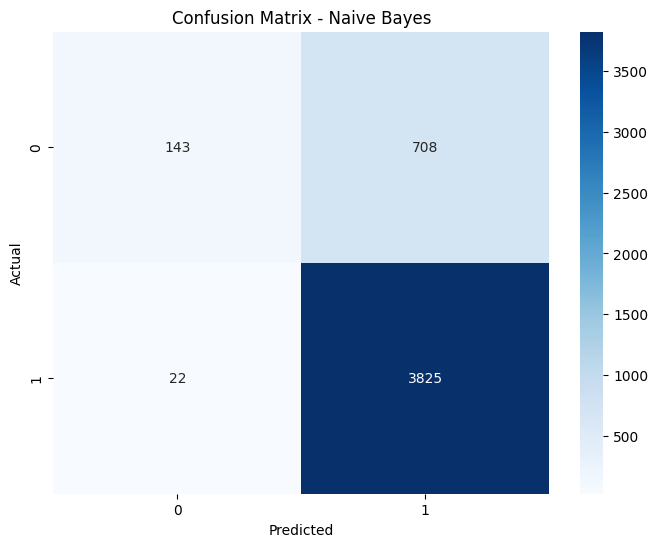

<Figure size 1000x600 with 0 Axes>

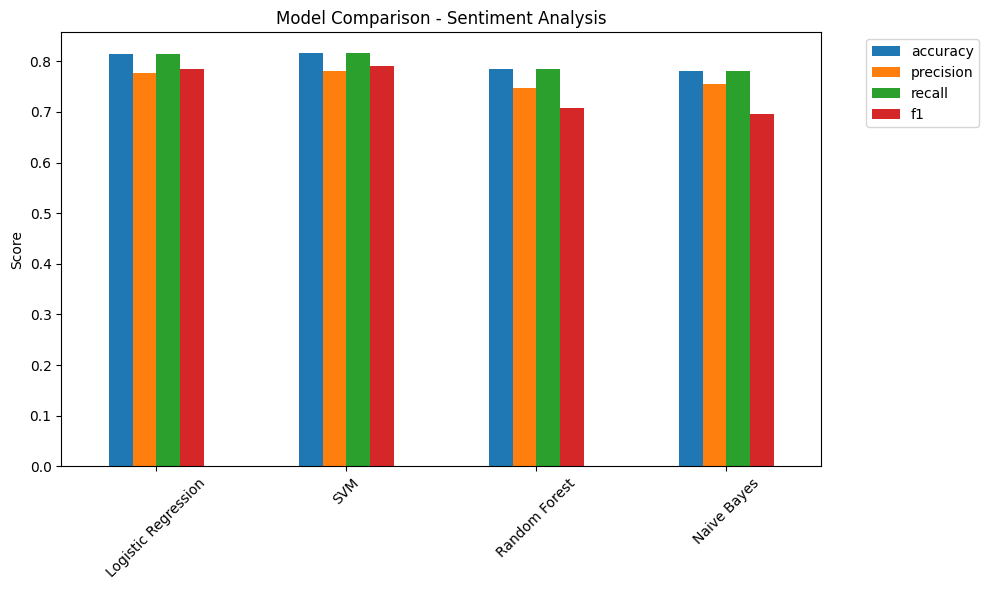

<Figure size 1000x600 with 0 Axes>

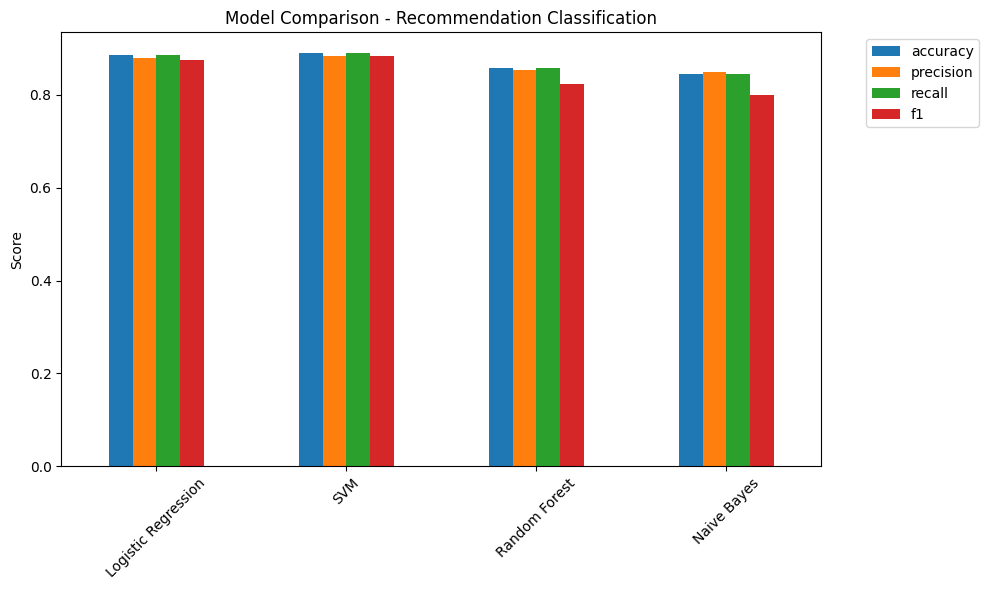

In [40]:
# Split data into train and test sets
X = df['Cleaned_Review']
y_sentiment = df['Sentiment_LABEL']
y_recommend = df['Recommended_LABEL']

X_train, X_test, y_train_sent, y_test_sent = train_test_split(X, y_sentiment, test_size=0.2, random_state=42)
_, _, y_train_rec, y_test_rec = train_test_split(X, y_recommend, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name, task='sentiment'):
    y_pred = model.predict(X_test)
    
    if task == 'sentiment':
        print(f"\n{model_name} - Sentiment Analysis Performance:")
        print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))
    else:
        print(f"\n{model_name} - Recommendation Classification Performance:")
        print(classification_report(y_test, y_pred, target_names=['Not Recommended', 'Recommended']))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }

# Train and evaluate models for sentiment analysis
models_sentiment = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': MultinomialNB()
}

results_sentiment = {}
for name, model in models_sentiment.items():
    model.fit(X_train_tfidf, y_train_sent)
    results_sentiment[name] = evaluate_model(model, X_test_tfidf, y_test_sent, name)

# Train and evaluate models for recommendation classification
models_recommend = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': MultinomialNB()
}

results_recommend = {}
for name, model in models_recommend.items():
    model.fit(X_train_tfidf, y_train_rec)
    results_recommend[name] = evaluate_model(model, X_test_tfidf, y_test_rec, name, task='recommendation')

# Compare model performance
def compare_results(results, title):
    df_results = pd.DataFrame(results).T
    plt.figure(figsize=(10, 6))
    df_results.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Model Comparison - {title}')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    return df_results

sentiment_comparison = compare_results(results_sentiment, 'Sentiment Analysis')
recommend_comparison = compare_results(results_recommend, 'Recommendation Classification')

2025-05-29 22:12:03.707081: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 22:12:04.040441: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 22:12:04.609435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748536925.417195  812129 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748536925.635323  812129 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748536926.385146  812129 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 103s 322ms/step - accuracy: 0.7667 - loss: 0.6938 - val_accuracy: 0.7886 - val_loss: 0.4916
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 93s 317ms/step - accuracy: 0.8238 - loss: 0.4225 - val_accuracy: 0.8103 - val_loss: 0.4601
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 91s 310ms/step - accuracy: 0.8422 - loss: 0.3684 - val_accuracy: 0.8065 - val_loss: 0.4902
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 83s 281ms/step - accuracy: 0.8614 - loss: 0.3300 - val_accuracy: 0.8069 - val_loss: 0.4792
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 90s 305ms/step - accuracy: 0.8736 - loss: 0.3040 - val_accuracy: 0.8093 - val_loss: 0.5423


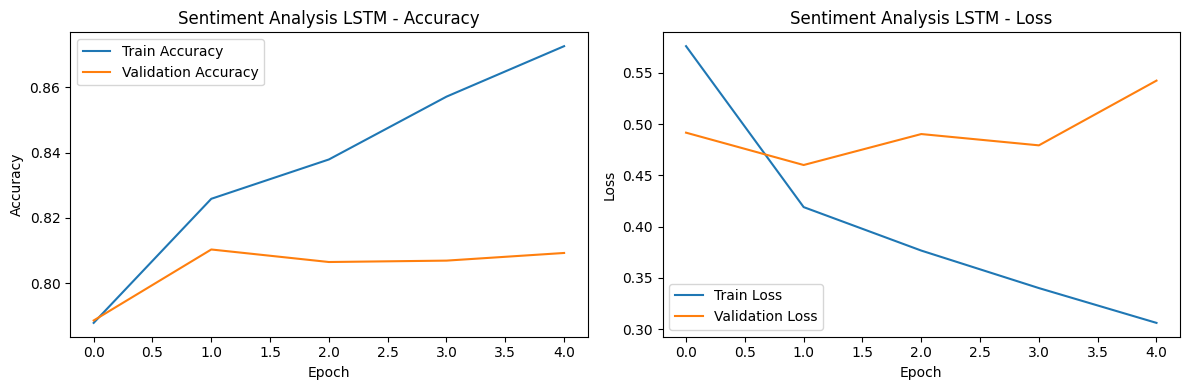

147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step

LSTM - Sentiment Analysis Performance:
              precision    recall  f1-score   support

    Negative       0.44      0.70      0.54       470
     Neutral       0.40      0.05      0.09       620
    Positive       0.89      0.95      0.92      3608

    accuracy                           0.81      4698
   macro avg       0.58      0.57      0.52      4698
weighted avg       0.78      0.81      0.77      4698

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 85s 266ms/step - accuracy: 0.8233 - loss: 0.4355 - val_accuracy: 0.8744 - val_loss: 0.2710
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 77s 263ms/step - accuracy: 0.9150 - loss: 0.2249 - val_accuracy: 0.8846 - val_loss: 0.2853
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 83s 281ms/step - accuracy: 0.9272 - loss: 0.1943 - val_accuracy: 0.8819 - val_loss: 0.2733
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 78s 265ms/step - accuracy: 0.9481 - loss: 0.1542 - val_accuracy: 0.8865 - val_loss: 0.3692


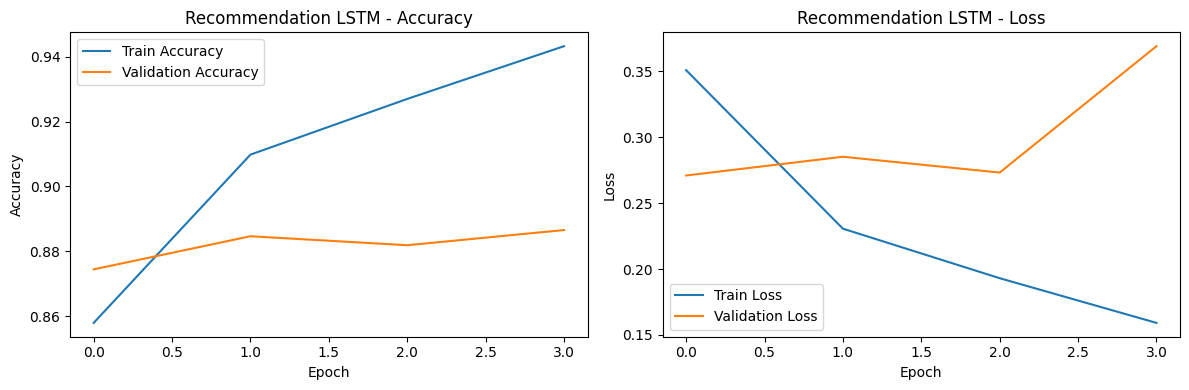

147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step

LSTM - Recommendation Classification Performance:
                 precision    recall  f1-score   support

Not Recommended       0.63      0.74      0.68       851
    Recommended       0.94      0.90      0.92      3847

       accuracy                           0.87      4698
      macro avg       0.79      0.82      0.80      4698
   weighted avg       0.88      0.87      0.88      4698



In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Tokenization and padding for LSTM
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = 100  # Based on EDA of review lengths
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# LSTM model for sentiment analysis
def build_lstm_model(num_classes):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=64, input_length=max_length),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.5),
        Bidirectional(LSTM(32)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')])
    
    model.compile(loss='sparse_categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Train LSTM for sentiment analysis
lstm_sentiment = build_lstm_model(3)  # 3 classes for sentiment
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_sentiment = lstm_sentiment.fit(
    X_train_pad, y_train_sent,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_pad, y_test_sent),
    callbacks=[early_stop]
)

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history_sentiment, 'Sentiment Analysis LSTM')

# Evaluate LSTM for sentiment analysis
y_pred_sent_lstm = np.argmax(lstm_sentiment.predict(X_test_pad), axis=1)
print("\nLSTM - Sentiment Analysis Performance:")
print(classification_report(y_test_sent, y_pred_sent_lstm, target_names=['Negative', 'Neutral', 'Positive']))

# Train LSTM for recommendation classification
lstm_recommend = build_lstm_model(1)  # Binary classification

history_recommend = lstm_recommend.fit(
    X_train_pad, y_train_rec,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_pad, y_test_rec),
    callbacks=[early_stop]
)

plot_history(history_recommend, 'Recommendation LSTM')

# Evaluate LSTM for recommendation
y_pred_rec_lstm = (lstm_recommend.predict(X_test_pad) > 0.5).astype(int)
print("\nLSTM - Recommendation Classification Performance:")
print(classification_report(y_test_rec, y_pred_rec_lstm, target_names=['Not Recommended', 'Recommended']))